In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
from mpl_toolkits.mplot3d import Axes3D

def calcul_d1(S,K,r,sigma,T,t):
    num = np.log(S/K) + (r+1/2*sigma**2)*(T-t)
    frac = sigma*np.sqrt(T-t)
    
    return num/frac
    
def calcul_d2(S,K,r,sigma,T,t):
    num = np.log(S/K) + (r-1/2*sigma**2)*(T-t)
    frac = sigma*np.sqrt(T-t)

    return num/frac

def calcul_N1(d1):
    return 1/2*special.erfc(-d1/np.sqrt(2))

def calcul_N2(d2):
    return 1/2*special.erfc(-d2/np.sqrt(2))


In [3]:
def black_scholes_call(S,K,r,sigma,T,t):
    d1 = calcul_d1(S,K,r,sigma,T,t)
    d2 = calcul_d2(S,K,r,sigma,T,t)

    return S*calcul_N1(d1)-K*np.exp(-r*(T-t))*calcul_N2(d2)


In [4]:
def two_D():
    
    K = 100 #valeur du strike
    r = 0.1 #taux sans risque 
    sigma = 0.3 #volatilité
    T = 1 #maturité
    t = 0
    L = np.log(3)
    N = 200
    h = 2/(N-1)
    x = np.arange(-1,1,h)
    S = K*np.exp(L*x) #valeur finale du sous-jacent

    call = black_scholes_call(S,K,r,sigma,T,t)
    plt.plot(S,call)
    plt.xlabel('S')
    plt.ylabel('valeur du call')



In [7]:
def three_D():
    
    N = 200
    K = 100 #valeur du strike
    r = 0.1 #taux sans risque 
    sigma = 0.3 #volatilité
    T = 1 #maturité
    e=1e-4

    Svals = np.linspace(e,300,N) # crée un tableau de valeur pour le tracer
    tvals = np.linspace(e,T-e,N)
    Smat,tmat = np.meshgrid(Svals,tvals) # crée un tableau de valeur pour le tracer

    call = black_scholes_call(Smat,K,r,sigma,T,tmat) # calcul du call dans tous les états

    fig = plt.figure(figsize = (10,7))
    ax = plt.axes(projection='3d')
    ax.plot_surface(Smat, tmat, call, rstride=1, cstride=1, cmap='jet', edgecolor='none')
    ax.set_title("Surface", fontsize = 13)
    ax.set_xlabel('x', fontsize = 11)
    ax.set_ylabel('y', fontsize = 11)
    ax.set_zlabel('Z', fontsize = 10)

    ax.view_init(50)
    plt.draw()

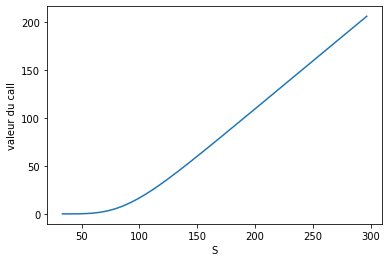

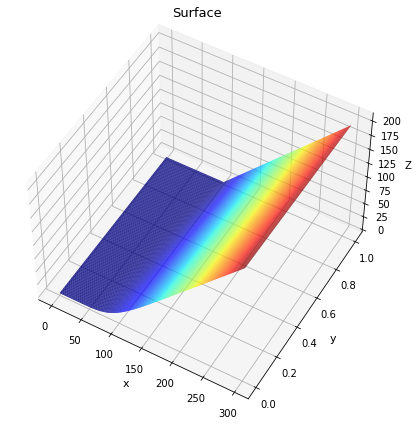

In [8]:
two_D()
three_D()